<h1>Multivariate Gaussian distribution</h1>

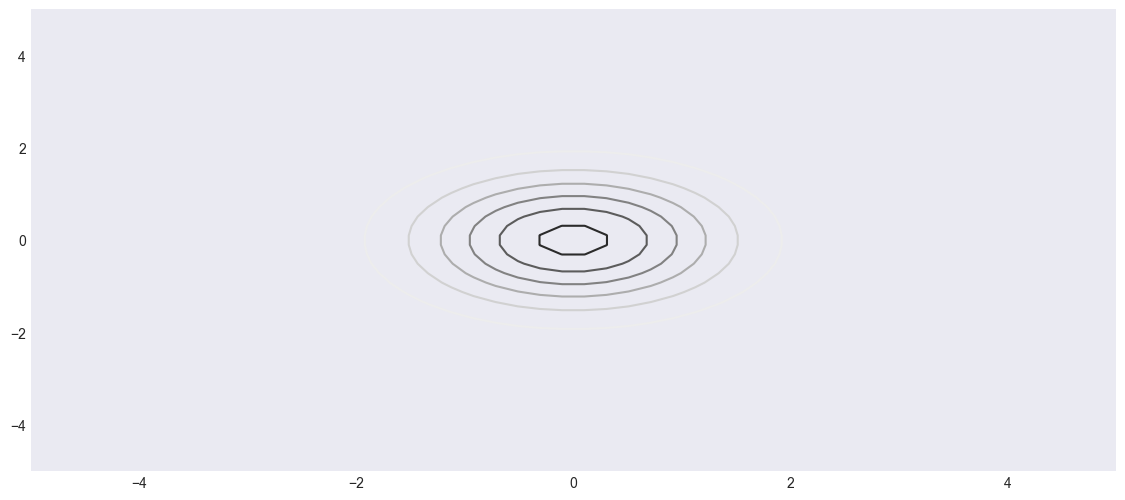

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

mean = np.array([0.0, 0.0])
sigma = np.array([
    [1.0, 0.0], 
    [0.0, 1.0]
])
sigma_inverse = np.linalg.inv(sigma)
sigma_det = np.linalg.det(sigma)
x_axis = np.linspace(-5, 5)
y_axis = np.linspace(-5, 5)
X, Y = np.meshgrid(x_axis, y_axis)
normalizer = 1.0 / ((2 * np.pi) ** 2 * sigma_det)
N = normalizer * np.e ** (-0.5 * (sigma_inverse[0,0]*(X-mean[0])**2 + (sigma_inverse[0,1] + sigma_inverse[1,0])*(X-mean[0])*(Y-mean[1]) + sigma_inverse[1,1]*(Y-mean[1])**2))
plt.contour(X, Y, N)
plt.show()

<h1>Bayesian Network</h1>

In [8]:
from pomegranate import *

cloudy = DiscreteDistribution({'T' : 0.5, 'F' : 0.5})
sprinkler = ConditionalProbabilityTable([
    ['T', 'T', 0.1],
    ['T', 'F', 0.5],
    ['F', 'T', 0.9],
    ['F', 'F', 0.5]
], [cloudy])

s1 = Node(cloudy, name='cloudy')
s2 = Node(sprinkler, name="sprinkler")
model = BayesianNetwork('sprinkler')
model.add_states(s1, s2)
model.add_edge(s1, s2)
model.bake()
print(model.predict([['T', None]]))
print(model.predict([['F', None]]))
print(model.predict([[None, 'T']]))
print(model.predict([[None, 'F']]))

[array(['T', 'F'], dtype=object)]
[array(['F', 'T'], dtype=object)]
[array(['F', 'T'], dtype=object)]
[array(['T', 'F'], dtype=object)]
